** NOT GETTING PROPER RESULTS, SUBMITTING THIS NOTEBOOK SO THAT I CAN GET FEEDBACKS TO IMPROVE**

# Table of Content


1. Installing tensorflow other necessary library


2. About the dataset


3. Importing the dataset and performing EDA


4. Building the model


5. Tuning the model - Droupouts and Increasing number of layers


6. Conclusion

# 1.Installing tensorflow other necessary library

In [1]:
!pip install tensorflow

In [2]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.4.1


In [3]:
conda install git

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




In [4]:
pip install -q git+https://github.com/tensorflow/docs

Note: you may need to restart the kernel to use updated packages.


In [5]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 2. About the dataset

Melanoma, also known as malignant melanoma, is a type of skin cancer that develops from the pigment-producing cells known as melanocytes.

Column	Description
- mass_npea: The mass of the area understudy for melanoma tumor.
- size_npear: The size of the area understudy for melanoma tumor.
- malign_ratio: Ratio of normal to malign surface understudy.
- damage_size: Unrecoverable area of skin damaged by the tumor.
- exposed_area: Total area exposed to the tumor.
- std_dev_malign: Standard deviation of malign skin measurements.
- err_malign: Error in malign skin measurements.
- malign_penalty: Penalty applied due to measurement error in the lab.
- damage_ratio: The ratio of damage to total spread on the skin.
- tumor_size: Size of melanoma_tumor. [target Variable]

# 3. Importing the dataset and performing EDA

In [6]:
df = pd.read_csv (r'C:\Users\pulmathur\Desktop\To Do things\DS\NN AI\Deep Learining Project\melanoma_tumor_size.csv')

In [7]:
df.head(10)

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.4870,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.8810,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.0930,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.0150,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.4140,3263.35,57,35.0200,18.023
5,6851.09,2195.18,0.32041,72.8283,9.484467e+05,97.1881,3688.57,40,36.3481,1.709
6,7069.24,1886.09,0.26680,58.2686,1.024783e+06,76.9447,3168.44,22,39.9961,9.937
7,16446.10,5115.45,0.31104,204.9740,2.167355e+06,265.8810,6425.91,242,22.9533,2.510
8,6814.73,2043.78,0.29990,90.0889,9.669835e+05,99.6286,3428.54,27,37.1642,12.568
9,5049.75,949.82,0.18809,41.2957,6.906229e+05,70.4142,2734.59,27,41.1366,13.428


In [8]:
df.isna().sum()

mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
tumor_size        0
dtype: int64

In [9]:
df.shape

(9146, 10)

In [10]:
df.dtypes

mass_npea         float64
size_npear        float64
malign_ratio      float64
damage_size       float64
exposed_area      float64
std_dev_malign    float64
err_malign        float64
malign_penalty      int64
damage_ratio      float64
tumor_size        float64
dtype: object

In [11]:
df.describe()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
count,9146.000000,9146.000000,9146.000000,9146.000000,9.146000e+03,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000
mean,9903.052174,3032.827837,0.303083,103.902118,1.372442e+06,146.304239,3992.936256,69.849661,34.461652,7.723348
std,4060.577116,1462.334147,0.062533,55.456862,5.646773e+05,70.512177,1780.672859,55.785332,5.972808,6.086852
min,2864.760000,510.530000,0.114820,10.310100,3.878534e+05,31.970400,1089.190000,0.000000,15.228000,0.000000
25%,6988.420000,1983.657500,0.259053,64.012525,9.596873e+05,95.853900,3177.682500,31.000000,30.290225,2.320000
50%,8895.965000,2684.330000,0.301055,88.458300,1.237057e+06,126.138500,3846.320000,54.000000,35.245750,5.060500
75%,12119.950000,3830.745000,0.343002,134.209000,1.693083e+06,182.251500,4664.577500,91.000000,38.806075,13.336000
max,36995.400000,13535.000000,0.525300,346.420000,4.978616e+06,528.890000,91983.700000,340.000000,46.546400,20.999000


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
y=df.tumor_size
x=df.drop('tumor_size',axis=1)

In [14]:
y.shape

(9146,)

In [15]:
x.shape

(9146, 9)

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio
8949,9279.33,2963.66,0.31938,94.5283,1.281164e+06,115.456,3560.96,38,35.7559
737,10209.30,3160.08,0.30952,118.1940,1.436840e+06,161.018,4254.72,50,33.5394
3163,8657.95,2217.82,0.25615,107.2310,1.168984e+06,146.623,3981.34,39,34.1118
2233,8571.74,2718.01,0.31708,61.3720,1.180775e+06,132.037,4332.09,53,33.5704
305,10265.30,3322.38,0.32365,123.7320,1.367620e+06,169.758,4036.83,43,34.1408


In [17]:
x_train.shape

(7316, 9)

In [18]:
x_test.shape

(1830, 9)

In [19]:
train_stats = x_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
mass_npea,7316.0,9.888941e+03,4037.691037,2864.76000,6997.085000,8.902245e+03,1.205747e+04,3.699540e+04
size_npear,7316.0,3.032549e+03,1461.301236,510.53000,1988.170000,2.679840e+03,3.813340e+03,1.353500e+04
malign_ratio,7316.0,3.034958e-01,0.062488,0.11482,0.259370,3.013250e-01,3.432375e-01,5.253000e-01
damage_size,7316.0,1.034967e+02,54.838103,10.31010,64.048625,8.834485e+01,1.331960e+02,3.464200e+02
exposed_area,7316.0,1.370749e+06,561678.145583,387853.40250,961393.850600,1.239389e+06,1.685079e+06,4.978616e+06
std_dev_malign,7316.0,1.460726e+02,70.065571,31.97040,96.054750,1.261855e+02,1.810447e+02,5.288900e+02
err_malign,7316.0,3.988486e+03,1794.703443,1108.90000,3180.055000,3.842560e+03,4.646993e+03,9.198370e+04
malign_penalty,7316.0,6.996679e+01,55.560467,0.00000,31.000000,5.500000e+01,9.100000e+01,3.400000e+02
damage_ratio,7316.0,3.448421e+01,5.946737,15.22800,30.461475,3.523950e+01,3.879875e+01,4.654640e+01


In [20]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [21]:
x_train_normed_data = norm(x_train)
x_test_normed_data = norm(x_test)

In [22]:
x_train_normed_data.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio
8949,-0.150980,-0.047142,0.254195,-0.163543,-0.159496,-0.436970,-0.238216,-0.575351,0.213847
737,0.079342,0.087273,0.096405,0.268013,0.117666,0.213306,0.148344,-0.359370,-0.158878
3163,-0.304875,-0.557536,-0.757678,0.068097,-0.359219,0.007856,-0.003982,-0.557353,-0.062624
2233,-0.326226,-0.215246,0.217388,-0.768165,-0.338227,-0.200320,0.191454,-0.305375,-0.153665
305,0.093212,0.198338,0.322528,0.369001,-0.005571,0.338047,0.026937,-0.485359,-0.057747


In [23]:
train_stats_normed = x_train_normed_data.describe()
train_stats_normed = train_stats_normed.transpose()
train_stats_normed

,count,mean,std,min,25%,50%,75%,max
mass_npea,7316.0,-4.155476e-15,1.0,-1.739653,-0.716215,-0.244371,0.537073,6.713357
size_npear,7316.0,1.086246e-15,1.0,-1.725872,-0.714691,-0.241366,0.534312,7.187054
malign_ratio,7316.0,-4.733509e-16,1.0,-3.019388,-0.706148,-0.034740,0.635988,3.549543
damage_size,7316.0,-2.961424e-15,1.0,-1.699304,-0.719355,-0.276301,0.541582,4.429827
exposed_area,7316.0,-2.280540e-16,1.0,-1.749927,-0.728808,-0.233871,0.559626,6.423370
std_dev_malign,7316.0,2.008114e-15,1.0,-1.628505,-0.713872,-0.283835,0.499135,5.463702
err_malign,7316.0,-1.926683e-15,1.0,-1.604492,-0.450454,-0.081309,0.366916,49.030504
malign_penalty,7316.0,-5.493449e-18,1.0,-1.259291,-0.701340,-0.269378,0.378564,4.860168
damage_ratio,7316.0,7.833476e-15,1.0,-3.238113,-0.676461,0.127010,0.725531,2.028372


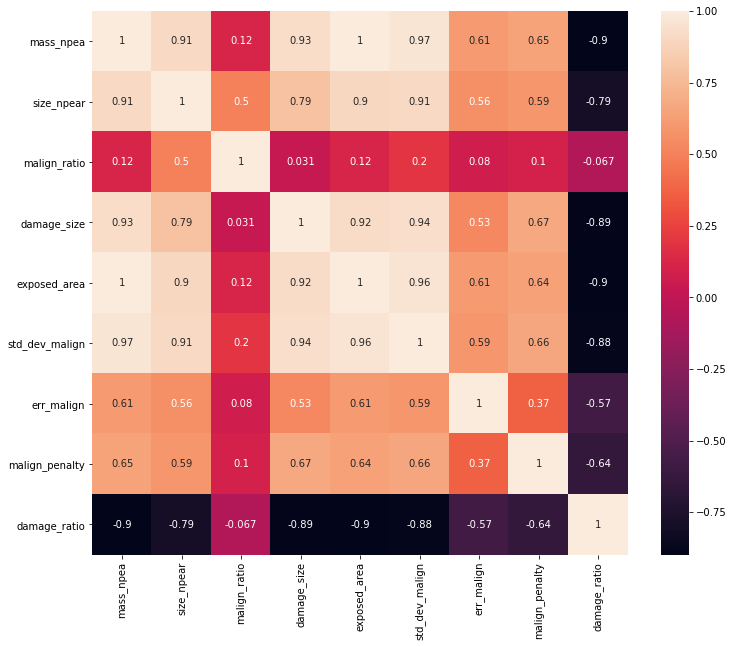

In [24]:
plt.figure(figsize=(12,10))
sb.heatmap(x_train.corr(), annot=True)

Heatmap shows that few features are showing Multicolilearity. So we need to drop them

In [25]:
x_train_normed_data_new = x_train_normed_data.drop(['mass_npea','exposed_area', 'std_dev_malign'], axis =1 )

In [26]:
x_train_normed_data_new.head()

,size_npear,malign_ratio,damage_size,err_malign,malign_penalty,damage_ratio
8949,-0.047142,0.254195,-0.163543,-0.238216,-0.575351,0.213847
737,0.087273,0.096405,0.268013,0.148344,-0.359370,-0.158878
3163,-0.557536,-0.757678,0.068097,-0.003982,-0.557353,-0.062624
2233,-0.215246,0.217388,-0.768165,0.191454,-0.305375,-0.153665
305,0.198338,0.322528,0.369001,0.026937,-0.485359,-0.057747


In [27]:
x_test_normed_data_new = x_test_normed_data.drop(['mass_npea','exposed_area', 'std_dev_malign'], axis =1 )

# 4. Building the model

In [28]:
model = Sequential()
model.add(Dense(12, input_dim=6, activation='relu', kernel_initializer='uniform'))
model.add(Dense(20, activation='relu', kernel_initializer='uniform'))
model.add(Dense(1, activation='linear', kernel_initializer='uniform'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                84        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                260       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 365
Trainable params: 365
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.compile(loss='mse', optimizer='sgd', metrics=['mae', 'mse','accuracy'])

In [31]:
history = model.fit(x_train_normed_data_new, y_train, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
183/183 [==============================] - 2s 7ms/step - loss: 51.2870 - mae: 5.5223 - mse: 51.2870 - accuracy: 0.0000e+00 - val_loss: 28.5266 - val_mae: 4.4730 - val_mse: 28.5266 - val_accuracy: 0.0000e+00
Epoch 2/100
183/183 [==============================] - 0s 2ms/step - loss: 26.9099 - mae: 4.3056 - mse: 26.9099 - accuracy: 0.0000e+00 - val_loss: 30.3501 - val_mae: 4.4933 - val_mse: 30.3501 - val_accuracy: 0.0000e+00
Epoch 3/100
183/183 [==============================] - 0s 1ms/step - loss: 26.4060 - mae: 4.1843 - mse: 26.4060 - accuracy: 0.0000e+00 - val_loss: 28.2938 - val_mae: 4.3998 - val_mse: 28.2938 - val_accuracy: 0.0000e+00
Epoch 4/100
183/183 [==============================] - 0s 1ms/step - loss: 26.3822 - mae: 4.1967 - mse: 26.3822 - accuracy: 0.0000e+00 - val_loss: 28.3158 - val_mae: 4.3151 - val_mse: 28.3158 - val_accuracy: 0.0000e+00
Epoch 5/100
183/183 [==============================] - 0s 1ms/step - loss: 26.7537 - mae: 4.2018 - mse: 26.7537 - accuracy: 

183/183 [==============================] - 0s 975us/step - loss: 22.7239 - mae: 3.7616 - mse: 22.7239 - accuracy: 0.0000e+00 - val_loss: 25.0854 - val_mae: 3.9431 - val_mse: 25.0854 - val_accuracy: 0.0000e+00
Epoch 39/100
183/183 [==============================] - 0s 937us/step - loss: 23.0765 - mae: 3.7710 - mse: 23.0765 - accuracy: 0.0000e+00 - val_loss: 25.4016 - val_mae: 4.0871 - val_mse: 25.4016 - val_accuracy: 0.0000e+00
Epoch 40/100
183/183 [==============================] - 0s 899us/step - loss: 22.9393 - mae: 3.7898 - mse: 22.9393 - accuracy: 0.0000e+00 - val_loss: 24.2822 - val_mae: 3.9963 - val_mse: 24.2822 - val_accuracy: 0.0000e+00
Epoch 41/100
183/183 [==============================] - 0s 904us/step - loss: 22.8270 - mae: 3.7648 - mse: 22.8270 - accuracy: 0.0000e+00 - val_loss: 25.0373 - val_mae: 3.9407 - val_mse: 25.0373 - val_accuracy: 0.0000e+00
Epoch 42/100
183/183 [==============================] - 0s 1ms/step - loss: 23.2853 - mae: 3.7886 - mse: 23.2853 - accuracy: 

Epoch 75/100
183/183 [==============================] - 0s 970us/step - loss: 21.3318 - mae: 3.6323 - mse: 21.3318 - accuracy: 0.0000e+00 - val_loss: 24.2906 - val_mae: 3.8985 - val_mse: 24.2906 - val_accuracy: 0.0000e+00
Epoch 76/100
183/183 [==============================] - 0s 901us/step - loss: 21.8829 - mae: 3.6352 - mse: 21.8829 - accuracy: 0.0000e+00 - val_loss: 24.6258 - val_mae: 3.8908 - val_mse: 24.6258 - val_accuracy: 0.0000e+00
Epoch 77/100
183/183 [==============================] - 0s 935us/step - loss: 21.6576 - mae: 3.6367 - mse: 21.6576 - accuracy: 0.0000e+00 - val_loss: 25.2444 - val_mae: 4.0600 - val_mse: 25.2444 - val_accuracy: 0.0000e+00
Epoch 78/100
183/183 [==============================] - 0s 943us/step - loss: 21.4413 - mae: 3.6162 - mse: 21.4413 - accuracy: 0.0000e+00 - val_loss: 24.6949 - val_mae: 3.9275 - val_mse: 24.6949 - val_accuracy: 0.0000e+00
Epoch 79/100
183/183 [==============================] - 0s 918us/step - loss: 22.0945 - mae: 3.6817 - mse: 22.09

Accuracy at every step is confusing, so low

In [32]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,accuracy,val_loss,val_mae,val_mse,val_accuracy,epoch
95,21.308676,3.602695,21.308676,0.000000,24.225912,4.050941,24.225912,0.000000,95
96,21.210510,3.597219,21.210510,0.000000,23.282696,3.756368,23.282696,0.000000,96
97,21.361685,3.602300,21.361685,0.000000,24.012112,3.793797,24.012112,0.000000,97
98,21.357912,3.597296,21.357912,0.000000,23.344849,3.775860,23.344849,0.000000,98
99,21.250200,3.601835,21.250200,0.000171,24.587208,3.845711,24.587208,0.000683,99


In [33]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE')

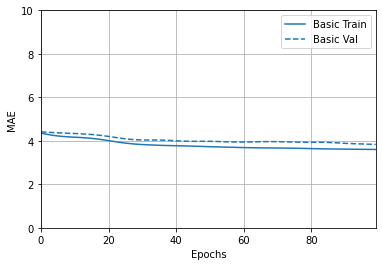

In [34]:
plotter.plot({'Basic': history}, metric="mae")
plt.ylim([0, 10])
plt.ylabel('MAE')

Text(0, 0.5, 'MSE')

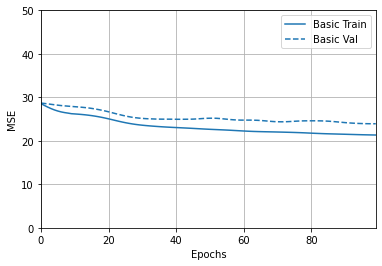

In [35]:
plotter.plot({'Basic': history}, metric="mse")
plt.ylim([0, 50])
plt.ylabel('MSE')

In [36]:
test_predictions = model.predict(x_test_normed_data_new).flatten()
test_predictions

array([ 9.777269 , -0.6776409,  6.0624466, ...,  6.4065094,  7.623273 ,
        2.026514 ], dtype=float32)

In [37]:
test_predictions.shape

(1830,)

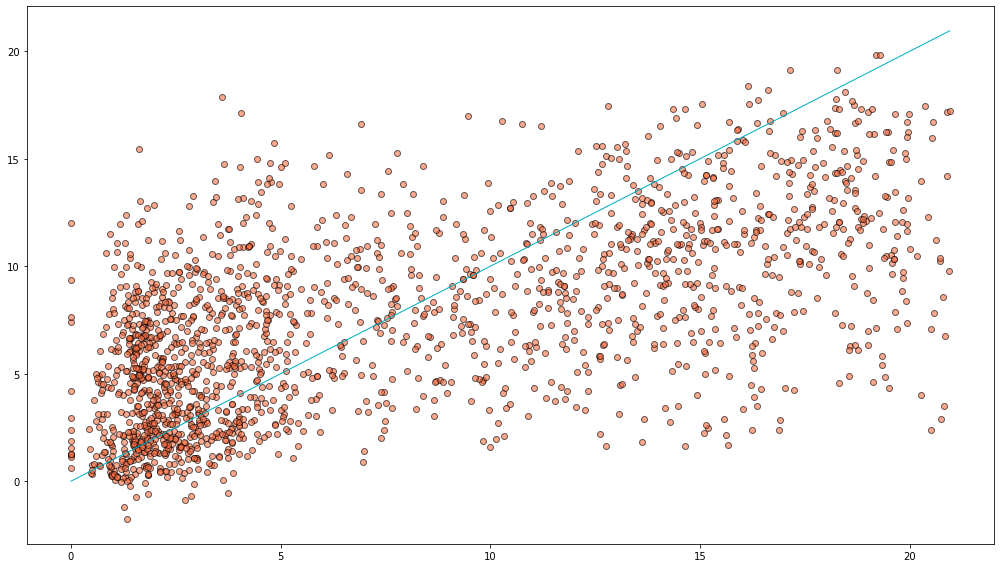

In [38]:
test_labels_ = y_test.to_numpy().flatten()
fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(test_labels_, test_predictions, alpha=0.6, 
            color='#ff7043', lw=1, ec='black')
lims = [0, max(test_predictions.max(), test_labels_.max())]
plt.plot(lims, lims, lw=1, color='#00acc1')
plt.tight_layout()
plt.show()

In [39]:
error = test_predictions - y_test

In [40]:
error.head()

4613   -4.683731
7821   -3.529641
3628   -4.848553
6826   -2.409182
3969    0.538341
Name: tumor_size, dtype: float64

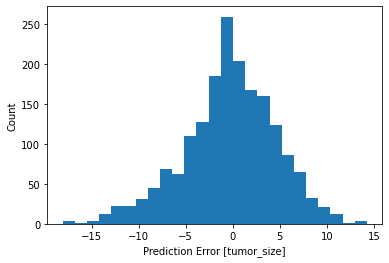

In [41]:
plt.hist(error, bins=25)
plt.xlabel("Prediction Error [tumor_size]")
_ = plt.ylabel("Count")

# 5. Tuning the model - Droupouts and Increasing number of layers

In [58]:
model2 = keras.Sequential([layers.Dense(100, activation='relu', input_dim = 6),
                          layers.Dense(100, activation='relu'),
                          layers.Dense(100, activation='relu'),
                          layers.Dense(100, activation='relu'),
                          layers.Dense(1)])

In [59]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 100)               700       
_________________________________________________________________
dense_14 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 31,101
Trainable params: 31,101
Non-trainable params: 0
_________________________________________________________________


In [60]:
model2.compile(loss='mse', optimizer='sgd', metrics=['mae', 'mse','accuracy'])

In [61]:
history2 = model2.fit(x_train_normed_data_new, y_train, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
183/183 [==============================] - 1s 2ms/step - loss: 44.7304 - mae: 5.2220 - mse: 44.7304 - accuracy: 0.0000e+00 - val_loss: 27.6343 - val_mae: 4.4752 - val_mse: 27.6343 - val_accuracy: 0.0000e+00
Epoch 2/100
183/183 [==============================] - 0s 1ms/step - loss: 25.5967 - mae: 4.0851 - mse: 25.5967 - accuracy: 0.0000e+00 - val_loss: 26.7604 - val_mae: 4.1197 - val_mse: 26.7604 - val_accuracy: 0.0000e+00
Epoch 3/100
183/183 [==============================] - 0s 1ms/step - loss: 24.6828 - mae: 3.9704 - mse: 24.6828 - accuracy: 0.0000e+00 - val_loss: 26.3200 - val_mae: 4.0294 - val_mse: 26.3200 - val_accuracy: 0.0000e+00
Epoch 4/100
183/183 [==============================] - 0s 1ms/step - loss: 24.6524 - mae: 3.9300 - mse: 24.6524 - accuracy: 0.0000e+00 - val_loss: 25.8202 - val_mae: 3.9795 - val_mse: 25.8202 - val_accuracy: 0.0000e+00
Epoch 5/100
183/183 [==============================] - 0s 1ms/step - loss: 23.5059 - mae: 3.8041 - mse: 23.5059 - accuracy: 

183/183 [==============================] - 0s 1ms/step - loss: 17.1727 - mae: 3.1115 - mse: 17.1727 - accuracy: 0.0000e+00 - val_loss: 21.0191 - val_mae: 3.4412 - val_mse: 21.0191 - val_accuracy: 0.0000e+00
Epoch 39/100
183/183 [==============================] - 0s 1ms/step - loss: 15.9959 - mae: 2.9508 - mse: 15.9959 - accuracy: 0.0000e+00 - val_loss: 20.9852 - val_mae: 3.4066 - val_mse: 20.9852 - val_accuracy: 0.0000e+00
Epoch 40/100
183/183 [==============================] - 0s 1ms/step - loss: 15.8052 - mae: 2.9660 - mse: 15.8052 - accuracy: 0.0000e+00 - val_loss: 20.0515 - val_mae: 3.3898 - val_mse: 20.0515 - val_accuracy: 0.0000e+00
Epoch 41/100
183/183 [==============================] - 0s 1ms/step - loss: 15.9187 - mae: 2.9715 - mse: 15.9187 - accuracy: 0.0000e+00 - val_loss: 20.9554 - val_mae: 3.3867 - val_mse: 20.9554 - val_accuracy: 0.0000e+00
Epoch 42/100
183/183 [==============================] - 0s 1ms/step - loss: 15.7818 - mae: 2.9424 - mse: 15.7818 - accuracy: 0.0000e+

183/183 [==============================] - 0s 1ms/step - loss: 11.2315 - mae: 2.3991 - mse: 11.2315 - accuracy: 0.0000e+00 - val_loss: 19.9881 - val_mae: 3.1444 - val_mse: 19.9881 - val_accuracy: 0.0000e+00
Epoch 76/100
183/183 [==============================] - 0s 1ms/step - loss: 10.5986 - mae: 2.3526 - mse: 10.5986 - accuracy: 9.4704e-06 - val_loss: 20.1149 - val_mae: 3.1605 - val_mse: 20.1149 - val_accuracy: 0.0000e+00
Epoch 77/100
183/183 [==============================] - 0s 1ms/step - loss: 10.0442 - mae: 2.2709 - mse: 10.0442 - accuracy: 1.4732e-04 - val_loss: 20.5630 - val_mae: 3.1754 - val_mse: 20.5630 - val_accuracy: 0.0000e+00
Epoch 78/100
183/183 [==============================] - 0s 1ms/step - loss: 10.1269 - mae: 2.2566 - mse: 10.1269 - accuracy: 2.4154e-04 - val_loss: 20.0459 - val_mae: 3.1491 - val_mse: 20.0459 - val_accuracy: 0.0000e+00
Epoch 79/100
183/183 [==============================] - 0s 1ms/step - loss: 10.0405 - mae: 2.2473 - mse: 10.0405 - accuracy: 0.0000e+

In [62]:
hist = pd.DataFrame(history2.history)
hist['epoch'] = history2.epoch
hist.tail()

,loss,mae,mse,accuracy,val_loss,val_mae,val_mse,val_accuracy,epoch
95,8.899424,2.098650,8.899424,0.000342,21.325594,3.236932,21.325594,0.0,95
96,8.644414,2.069258,8.644414,0.000342,20.415058,3.081027,20.415058,0.0,96
97,8.560539,2.058560,8.560539,0.000171,21.225033,3.202273,21.225033,0.0,97
98,8.603041,2.038814,8.603041,0.000171,22.581717,3.342667,22.581717,0.0,98
99,9.868273,2.212670,9.868273,0.000342,21.161699,3.195840,21.161699,0.0,99


In [63]:
test_predictions2 = model2.predict(x_test_normed_data_new).flatten()

In [64]:
test_predictions2

array([6.817194  , 1.957797  , 4.077713  , ..., 5.5599713 , 6.108639  ,
       0.40977812], dtype=float32)

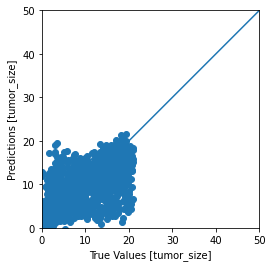

In [65]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions2)
plt.xlabel('True Values [tumor_size]')
plt.ylabel('Predictions [tumor_size]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

# Introducing Droupouts

In [50]:
model_d = keras.Sequential([layers.Dense(100, activation='relu', input_dim=6),
                          layers.Dropout(0.25),
                          layers.Dense(100, activation='relu'),
                          layers.Dropout(0.25),
                          layers.Dense(200, activation='relu'),
                          layers.Dropout(0.25),
                          layers.Dense(300, activation='relu'),
                          layers.Dropout(0.25),
                          layers.Dense(1)])

In [51]:
model_d.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               700       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 200)               20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 300)              

In [52]:
model_d.compile(loss='mse', optimizer='sgd', metrics=['mae', 'mse'])

In [53]:
history_droupout = model_d.fit(x_train_normed_data_new, y_train, epochs=100, verbose=0, validation_split=0.2)

In [54]:
hist_droupout = pd.DataFrame(history_droupout.history)
hist_droupout['epoch'] = history_droupout.epoch
hist_droupout.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,20.048199,3.434966,20.048199,21.104712,3.488861,21.104712,95
96,19.886850,3.430491,19.886850,20.628399,3.512130,20.628399,96
97,19.655098,3.391399,19.655098,20.712214,3.552512,20.712214,97
98,19.869312,3.419158,19.869312,21.797253,3.548740,21.797253,98
99,19.376802,3.369358,19.376802,20.743801,3.541797,20.743801,99


In [55]:
loss, mae, mse = model_d.evaluate(x_test_normed_data_new, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

58/58 - 0s - loss: 20.4822 - mae: 3.4832 - mse: 20.4822
Testing set Mean Abs Error:  3.48 MPG


Text(0, 0.5, 'MAE, tumor_size')

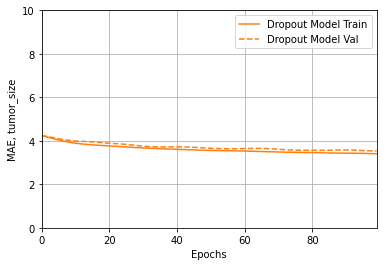

In [56]:
plotter.plot({'Dropout Model': history_droupout}, metric="mae")
plt.ylim([0, 10])
plt.ylabel('MAE, tumor_size')

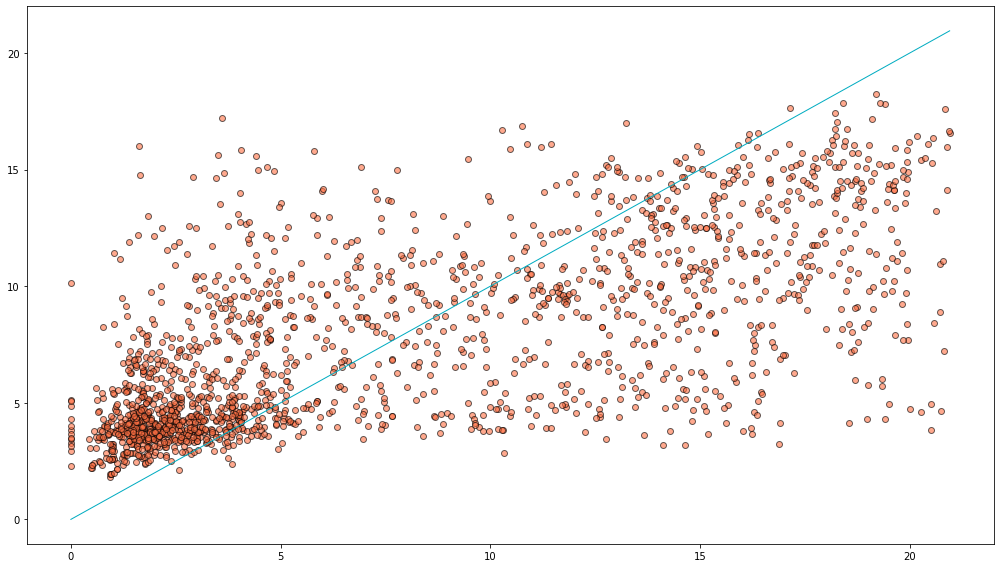

In [57]:
test_predictions_d = model_d.predict(x_test_normed_data_new).flatten()
test_labels_ = y_test.to_numpy().flatten()
fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(test_labels_, test_predictions_d, alpha=0.6, 
            color='#ff7043', lw=1, ec='black')
lims = [0, max(test_predictions_d.max(), test_labels_.max())]
plt.plot(lims, lims, lw=1, color='#00acc1')
plt.tight_layout()
plt.show()

# 6. Conclusion

To study a regression problem, we used ANN methodology. Errors are still high and accuracy is very low. 
Prodiction and error graphs are still inappropriate. We tried:
- Basic Modeling of dataset
- Modeling dataset with increased hidden layers
- Using regularization techinique Droupout.